In [70]:
 
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import pickle

In [71]:
 
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [72]:
dataset = pd.read_csv('dataSet.csv')

In [73]:
dataset

,name,review,text,likes
0,Homestan Room Darkening Thermal Insulated Poly...,5,"Good product acts very quickly, the golden col...",11
1,"iQOO Z6 Lite 5G (Stellar Green, 6GB RAM, 128GB...",5,"Good product acts very quickly, the golden col...",32
2,"Redgear Toad with Super Low Latency(40Ms), in ...",3,Color it gives is amazing. And shine also. Tho...,27
3,Story@Home Blackout Curtains 7 Feet Long Set o...,4,Color it gives is amazing. And shine also. Tho...,9
4,Story@Home Blackout Curtains 7 Feet Long Set o...,4,"Good product acts very quickly, the golden col...",9
5,Story@Home Blackout Curtains 7 Feet Long Set o...,4,"Good product acts very quickly, the golden col...",42
6,The Derma Co 1% Hyaluronic Sunscreen Aqua Ultr...,3,Color it gives is amazing. And shine also. Tho...,6


In [74]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   name    7 non-null      object
 1   review  7 non-null      int64 
 2   text    7 non-null      object
 3   likes   7 non-null      int64 
dtypes: int64(2), object(2)
memory usage: 356.0+ bytes


In [75]:
#1,2,3->negative(i.e 0)
dataset.loc[dataset['review']<=3,'review'] = 0
 
#4,5->positive(i.e 1)
dataset.loc[dataset['review']>3,'review'] = 1

In [76]:
stp_words=stopwords.words('english')
def clean_review(review): 
  cleanreview=" ".join(word for word in review.
                       split() if word not in stp_words)
  return cleanreview 
 
dataset['text']=dataset['text'].apply(clean_review)

In [77]:
 
dataset

,name,review,text,likes
0,Homestan Room Darkening Thermal Insulated Poly...,1,"Good product acts quickly, golden color slight...",11
1,"iQOO Z6 Lite 5G (Stellar Green, 6GB RAM, 128GB...",1,"Good product acts quickly, golden color slight...",32
2,"Redgear Toad with Super Low Latency(40Ms), in ...",0,Color gives amazing. And shine also. Though la...,27
3,Story@Home Blackout Curtains 7 Feet Long Set o...,1,Color gives amazing. And shine also. Though la...,9
4,Story@Home Blackout Curtains 7 Feet Long Set o...,1,"Good product acts quickly, golden color slight...",9
5,Story@Home Blackout Curtains 7 Feet Long Set o...,1,"Good product acts quickly, golden color slight...",42
6,The Derma Co 1% Hyaluronic Sunscreen Aqua Ultr...,0,Color gives amazing. And shine also. Though la...,6


In [78]:
dataset['review'].value_counts()

review
1    5
0    2
Name: count, dtype: int64

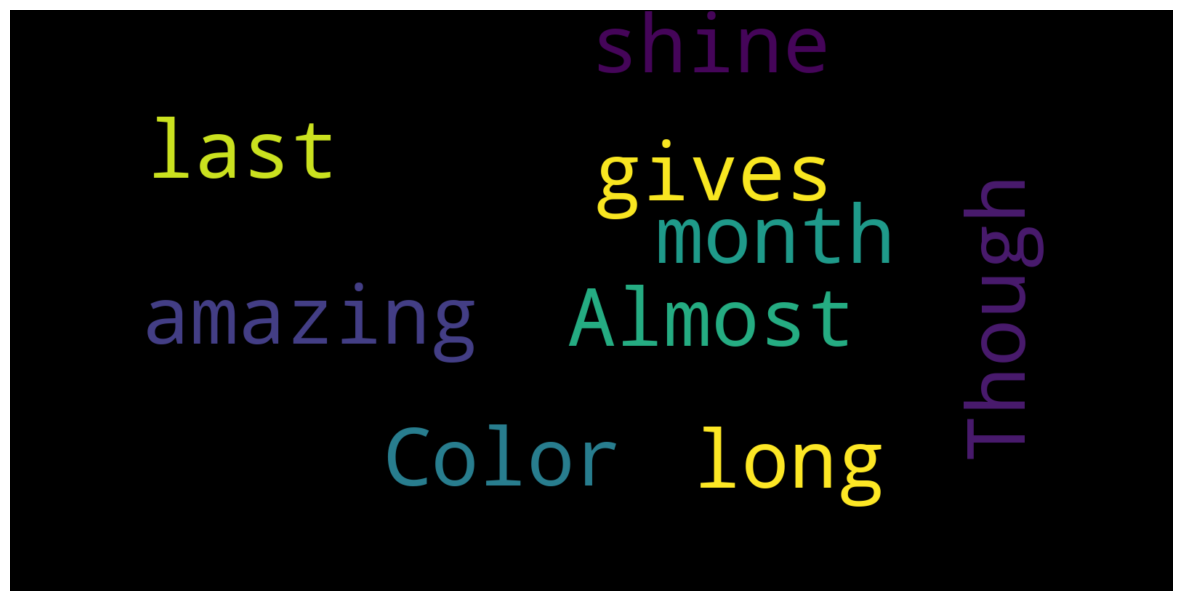

In [79]:
   
consolidated=' '.join(word for word in dataset['text'][dataset['review']==0].astype(str))
wordCloud=WordCloud(width=1600,height=800,random_state=21,max_font_size=110)
plt.figure(figsize=(15,10))
plt.imshow(wordCloud.generate(consolidated),interpolation='bilinear')
plt.axis('off')
plt.show()

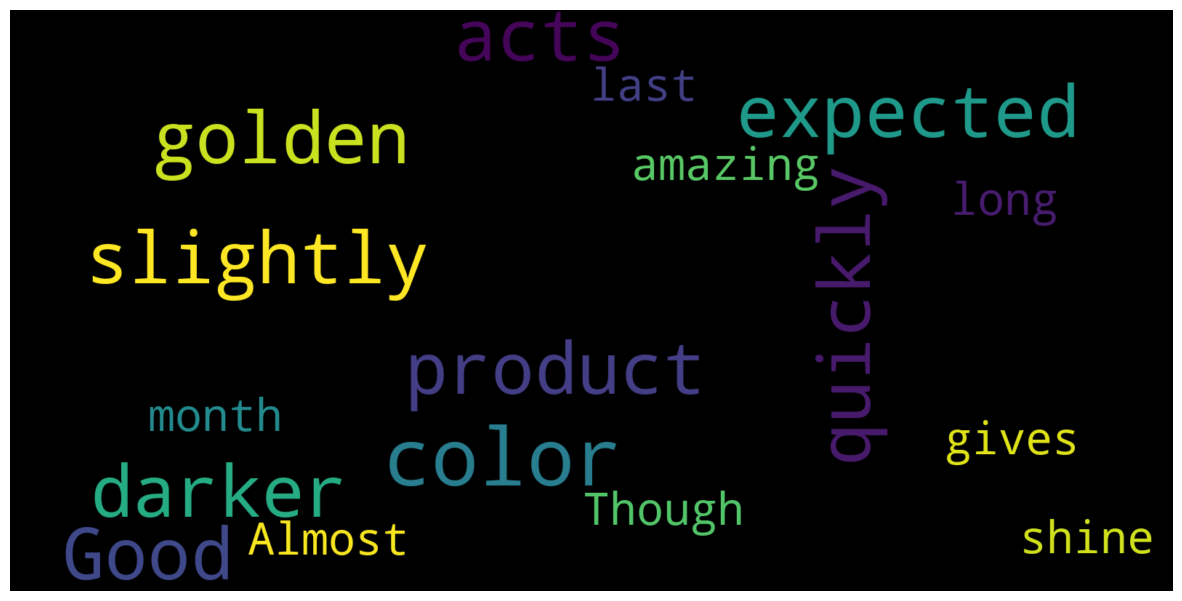

In [80]:
consolidated=' '.join(word for word in dataset['text'][dataset['review']==1].astype(str))
wordCloud=WordCloud(width=1600,height=800,random_state=21,max_font_size=110)
plt.figure(figsize=(15,10))
plt.imshow(wordCloud.generate(consolidated),interpolation='bilinear')
plt.axis('off')
plt.show()

In [81]:
dataset['text']

0    Good product acts quickly, golden color slight...
1    Good product acts quickly, golden color slight...
2    Color gives amazing. And shine also. Though la...
3    Color gives amazing. And shine also. Though la...
4    Good product acts quickly, golden color slight...
5    Good product acts quickly, golden color slight...
6    Color gives amazing. And shine also. Though la...
Name: text, dtype: object

In [82]:
vectorizer = TfidfVectorizer(use_idf = True,lowercase = True, strip_accents='ascii',stop_words=stp_words)


In [83]:
vectorizer

TfidfVectorizer(stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours',
                            'ourselves', 'you', "you're", "you've", "you'll",
                            "you'd", 'your', 'yours', 'yourself', 'yourselves',
                            'he', 'him', 'his', 'himself', 'she', "she's",
                            'her', 'hers', 'herself', 'it', "it's", 'its',
                            'itself', ...],
                strip_accents='ascii')

In [84]:
cv = TfidfVectorizer(max_features=2500)
X = vectorizer.fit_transform(dataset['text'] ).toarray()
pickle.dump(vectorizer, open('tranform.pkl', 'wb'))

In [85]:
X

array([[0.34375085, 0.        , 0.        , 0.        , 0.23384354,
        0.34375085, 0.34375085, 0.        , 0.34375085, 0.34375085,
        0.        , 0.        , 0.        , 0.34375085, 0.34375085,
        0.        , 0.34375085, 0.        ],
       [0.34375085, 0.        , 0.        , 0.        , 0.23384354,
        0.34375085, 0.34375085, 0.        , 0.34375085, 0.34375085,
        0.        , 0.        , 0.        , 0.34375085, 0.34375085,
        0.        , 0.34375085, 0.        ],
       [0.        , 0.32705548, 0.32705548, 0.32705548, 0.19316423,
        0.        , 0.        , 0.32705548, 0.        , 0.        ,
        0.32705548, 0.32705548, 0.32705548, 0.        , 0.        ,
        0.32705548, 0.        , 0.32705548],
       [0.        , 0.32705548, 0.32705548, 0.32705548, 0.19316423,
        0.        , 0.        , 0.32705548, 0.        , 0.        ,
        0.32705548, 0.32705548, 0.32705548, 0.        , 0.        ,
        0.32705548, 0.        , 0.32705548],
    

In [86]:
from sklearn.model_selection import train_test_split
x_train ,x_test,y_train,y_test=train_test_split(X,dataset['review'],
                                                test_size=0.25 ,
                                                random_state=42)

In [87]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score,accuracy_score
model=LogisticRegression()
 
#Model fitting
model.fit(x_train,y_train)
 
#testing the model
pred=model.predict(x_test)
 
#model accuracy
print(accuracy_score(y_test,pred))

1.0


In [89]:
pred

array([1, 1], dtype=int64)

In [88]:
filename = 'nlp_model.pkl'
pickle.dump(model, open(filename, 'wb'))